In [19]:
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
Inngroup = pd.read_csv("/kaggle/input/inngoup/INNHotelsGroup.csv")


In [4]:
new=Inngroup.copy()

In [6]:
new = new.drop(["Booking_ID"], axis=1)

In [99]:
new.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [100]:
new.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [41]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [42]:
new.duplicated().sum()

10275

In [43]:
new.shape

(36275, 18)

 **summary statistics of the dataset**

In [44]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


1. no_of_children has most of the outliners on the right side since 75% value is 0 and maximum value is 10
2. required_car_parking_space graph may be parallel to x-axis since all the values are 0
3. no_of_previous_cancellations would have most outliners on the right side since 75% value is 0 and maximum value is 13
4. avg_price_per_room has outliners on the both side since minimum value is 0 and 25% value is 80.3 and 75% value is 120 and maximum value is 540
5. lead_time has outliners on the both side since minimum value is 0 and 25% value is 17 and 75% value is 126 and maximum value is 443



**Univariate Analysis**

In [35]:
def hist_box(new,col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15,0.85)}, figsize=(14,6))
    sns.boxplot(new[col],ax=ax_box,showmeans=True)
    sns.distplot(new[col],ax=ax_hist)
    plt.show()
        
    

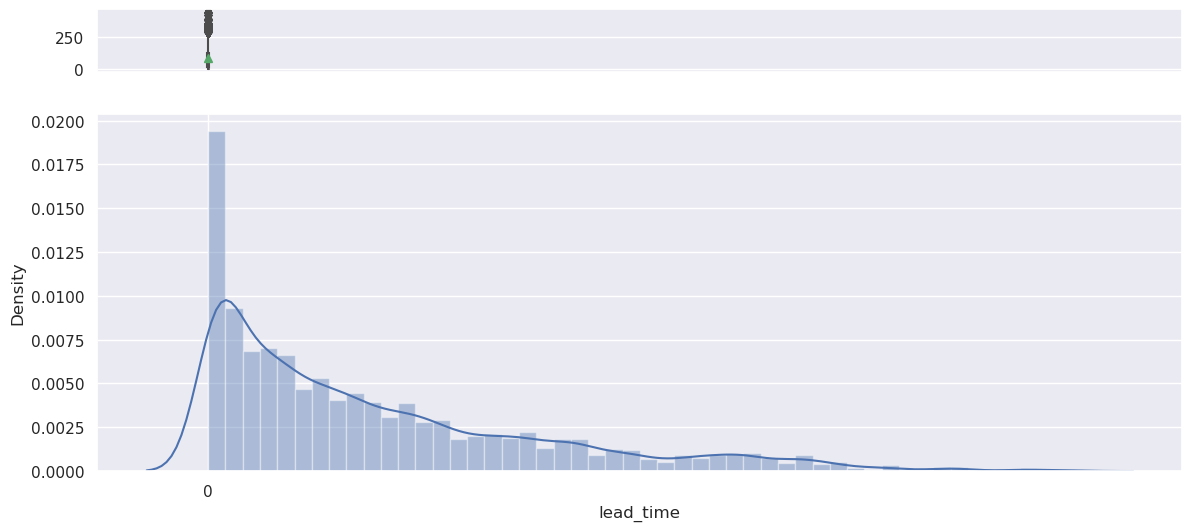

In [45]:
hist_box(new,'lead_time')

1. The distribution of the data is right-skewed
2. There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot.
1. The duration of the pitch for most of the customers is less than 100.

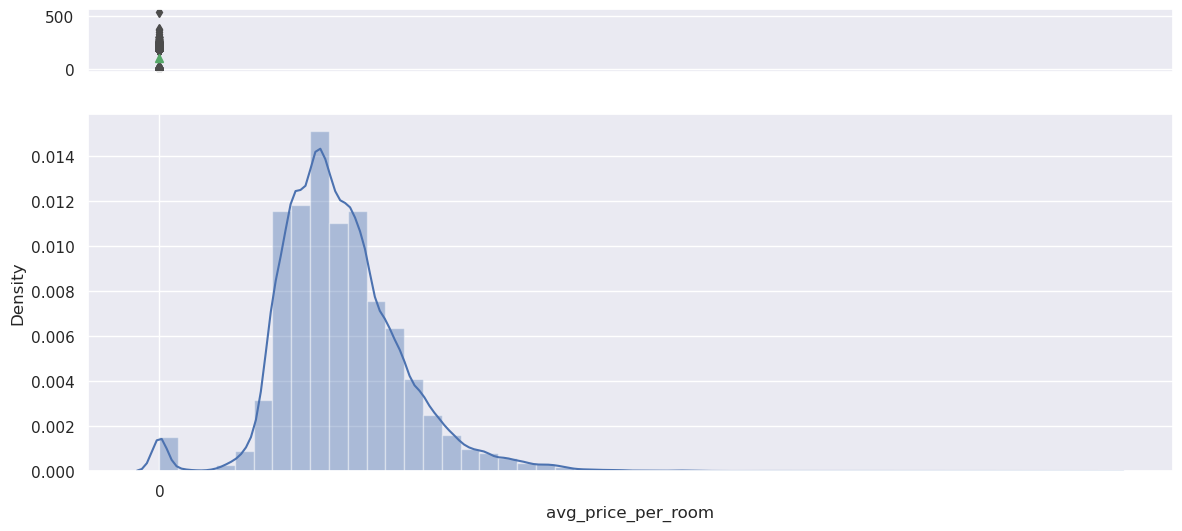

In [46]:
hist_box(new,'avg_price_per_room')

1. Most of the data is located near the median
2. The distribution of the data is roughly symmetric
3. There are some observations on the left and some observations on the right of the boxplot which can be considered as outliers.
4. The distribution for monthly income shows that most of the values lie between 0 to 180.

In [47]:
new[new["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


Some rooms in the hotel are priced 0 maybe they were give by the hotel as complimentary or for the promotions

In [48]:
new.loc[new["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

Hence we can see that most the rooms are given as complimentary to the families maybe for hotel promotion

**Bivariate Analysis**

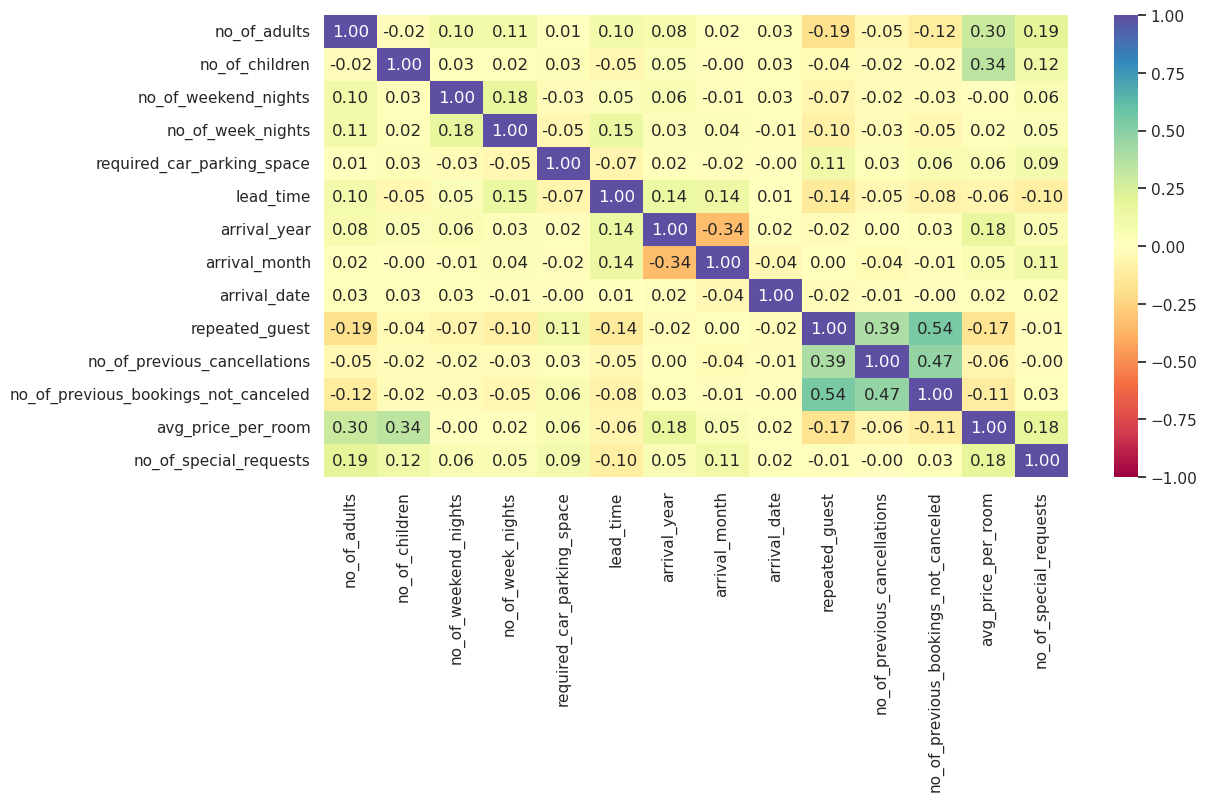

In [49]:
cols = new.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 6))
sns.heatmap(
    new[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

1. no_of_adults and avg_price_per_room are positively correlated
2. no_of_children and avg_price_per_room are positively correlated
3. repeated_guest and no_of_previous_booking_not_cancelled are positively correlated
4. no_of_previous_cancellations and no_of_previous_booking_not_cancelled are positively correlated
5. no_of_adults and repeated_guest are negatively correlated
6. arrival_year and arrival_month are negatively correlated
1. repeated_guest and avg_price_per_room are negatively correlated


In [50]:
def stacked_barplot(new,predictor,target,figsize=(10,7)):
    (pd.crosstab(new[predictor],new[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
    plt.legend(loc='lower right')
    plt.ylabel('Percentage Cancellations %')

In [51]:
new.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

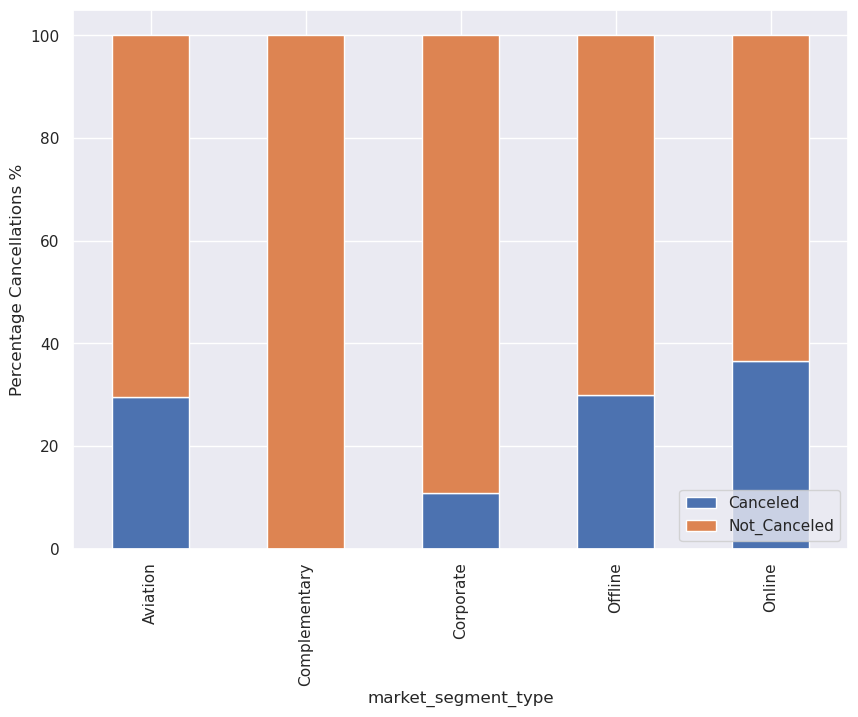

In [52]:
stacked_barplot(new,'market_segment_type','booking_status')

1. Complementary users are most common customers and percentage of cancellations is 0
2. Corporate users are second most common customers and has second highest from all type of customer
3. Based on the graph we can tell that comany mainly need to focus on Aviation,Offline,Online type of customers


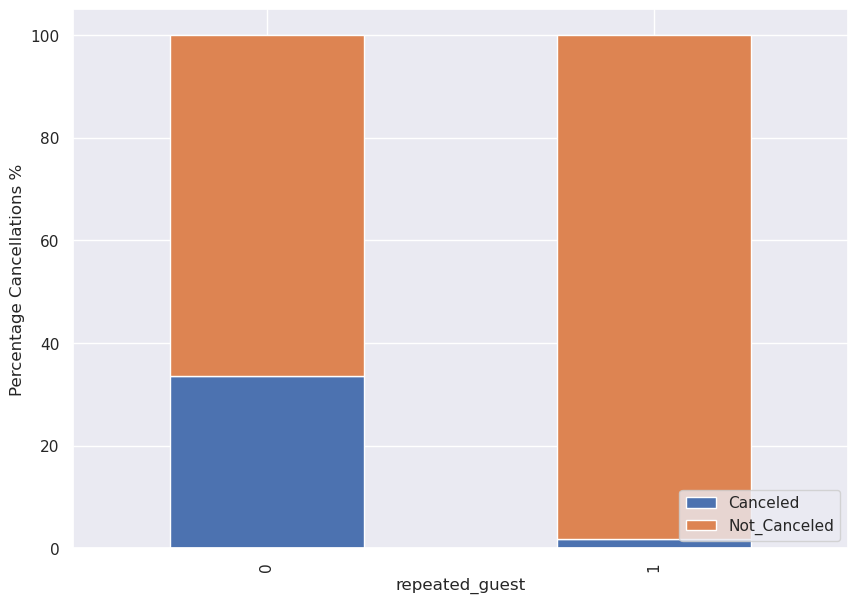

In [53]:
stacked_barplot(new,'repeated_guest','booking_status')

1. Repeated guests have least number of cancellations
2. Hence company can take measures such as complimentary meals and refund policies towards Non_Repeated guests

# **Cancelled is defined as 0 and Non cancelled as 1 in binary form**

In [8]:
X = new.drop(["booking_status"], axis=1)
Y = new["booking_status"]
X = pd.get_dummies(X, drop_first=True)

In [9]:
X_train,X_test,y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [10]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
Not_Canceled    0.672377
Canceled        0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
Not_Canceled    0.672333
Canceled        0.327667
Name: booking_status, dtype: float64


In [33]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=[' Not Cancelled', ' Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Logistic Regression**

In [34]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred_train = log.predict(X_train)

              precision    recall  f1-score   support

    Canceled       0.73      0.61      0.66      8319
Not_Canceled       0.82      0.89      0.86     17073

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



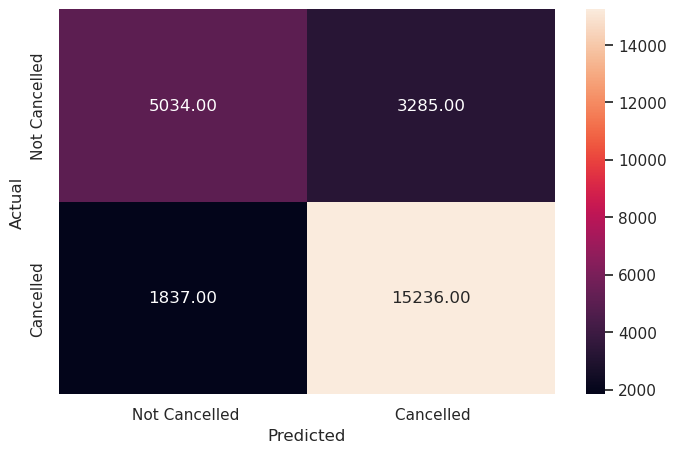

In [51]:
metrics_score(y_train, y_pred_train)

The model has recall score of 61%

              precision    recall  f1-score   support

    Canceled       0.73      0.61      0.66      3566
Not_Canceled       0.82      0.89      0.86      7317

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



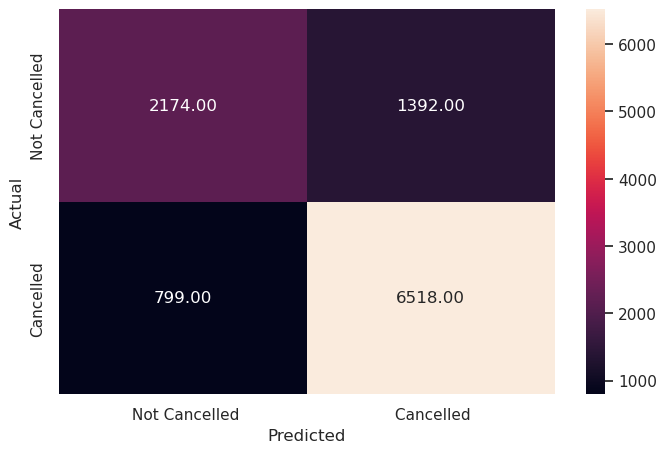

In [52]:
y_pred_test = log.predict(X_test)
metrics_score(y_test, y_pred_test)


The model has recall score of 61%

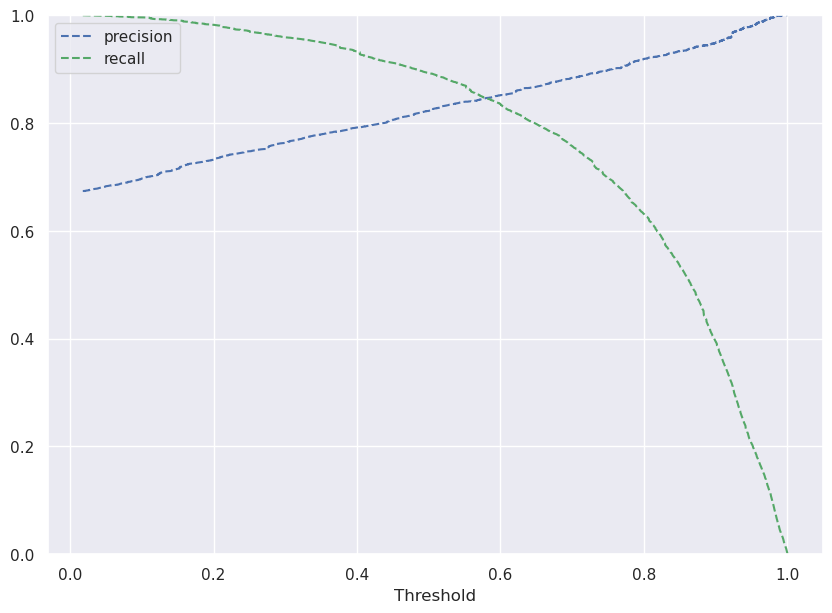

In [38]:
y_scores_lg = log.predict_proba(X_train)
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(
    y_train_binary, y_scores_lg[:, 1]
)

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [40]:
optimal_threshold = 0.6

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      8319
           1       0.85      0.84      0.84     17073

    accuracy                           0.79     25392
   macro avg       0.76      0.77      0.77     25392
weighted avg       0.79      0.79      0.79     25392



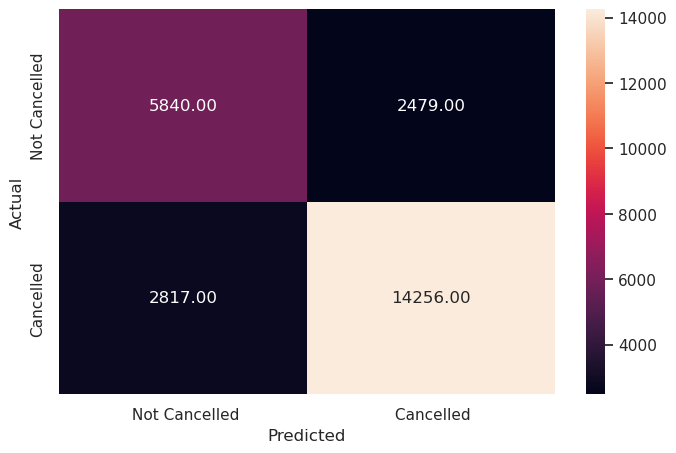

In [44]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_pred_encoded = (y_pred_train[:, 1] > optimal_threshold).astype(int)
y_pred_encoded = log.predict_proba(X_train)
metrics_score(y_train_encoded, y_pred_encoded[:, 1] > optimal_threshold)

1. The model performance has improved after defining optimum_threshold as 0.6
2. The recall score is increased by 9%

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3566
           1       0.85      0.83      0.84      7317

    accuracy                           0.79     10883
   macro avg       0.76      0.77      0.76     10883
weighted avg       0.79      0.79      0.79     10883



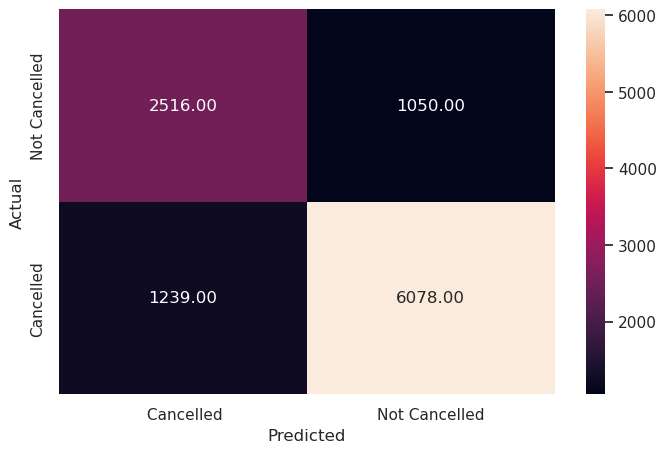

In [27]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = (y_pred_test[:, 1] > optimal_threshold).astype(int)
y_pred_encoded = log.predict_proba(X_test)
metrics_score(y_test_encoded, y_pred_encoded[:, 1] > optimal_threshold)

1. The model performance has improved after defining optimum_threshold as 0.6
2. The recall score is increased by 10%

**Support Vector Machines**

In [47]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [48]:
svm = SVC( kernel="linear", probability=True) 
model = svm.fit(X=X_train_scaled, y=y_train)

              precision    recall  f1-score   support

    Canceled       0.74      0.61      0.67      8319
Not_Canceled       0.82      0.90      0.86     17073

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



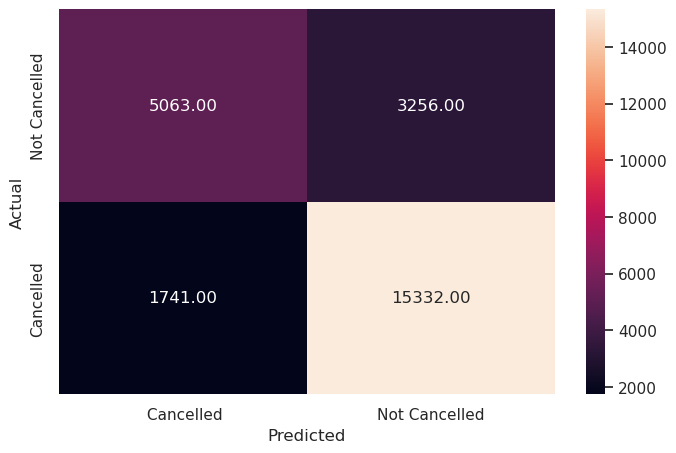

In [31]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

Recall score is 61%

              precision    recall  f1-score   support

    Canceled       0.74      0.62      0.68      3566
Not_Canceled       0.83      0.90      0.86      7317

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



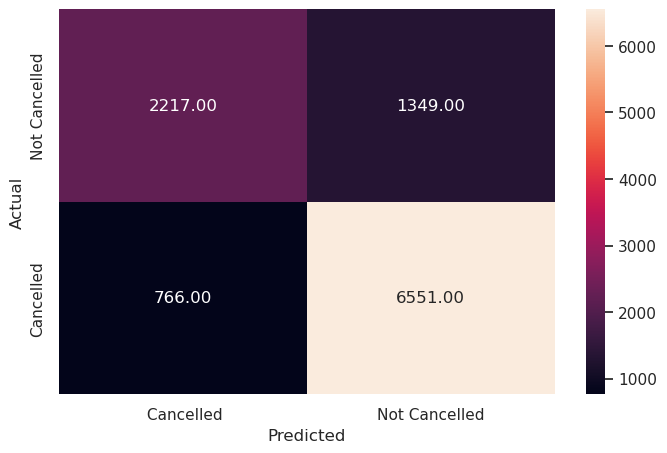

In [32]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

The model has recall score of 62%

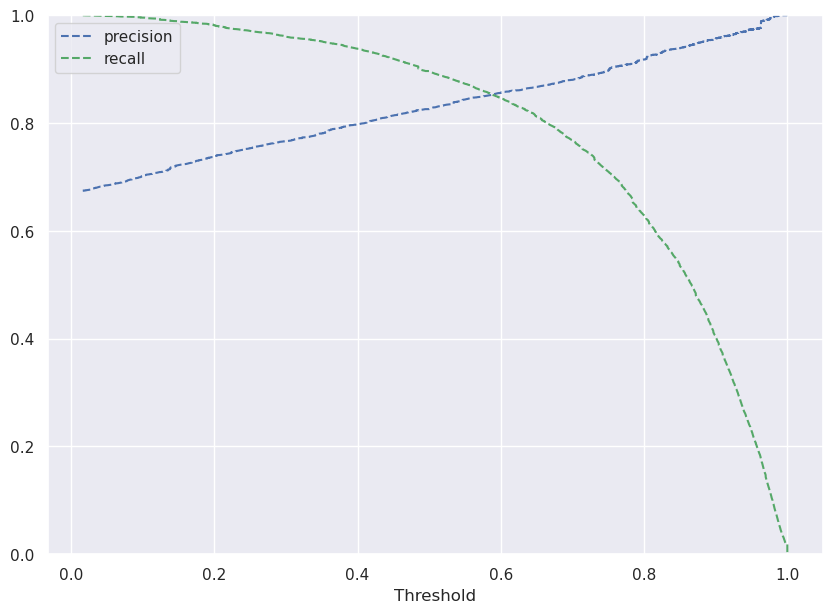

In [49]:
y_scores_svm=model.predict_proba(X_train_scaled)
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_binary, y_scores_svm[:, 1],pos_label=1)
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

The optimum threshold value is 0.6 which seems properly accurate

In [54]:
optimal_threshold_svm=0.60

              precision    recall  f1-score   support

    Canceled       0.69      0.71      0.70      8319
Not_Canceled       0.86      0.85      0.85     17073

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



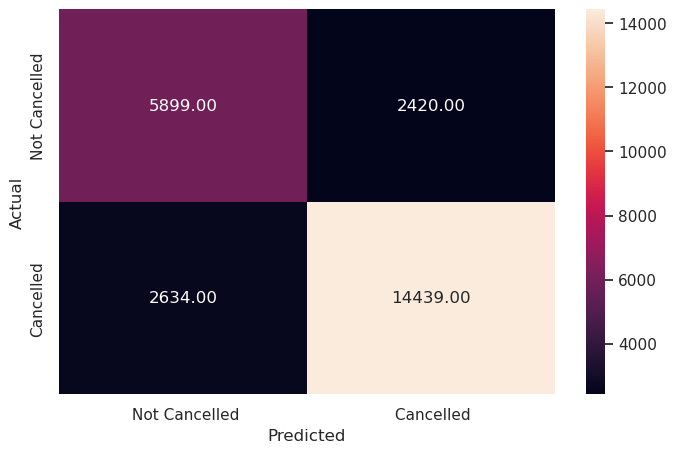

In [61]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
y_pred_train_labels = np.where(y_pred_train_svm[:, 1] > optimal_threshold_svm, 'Not_Canceled', 'Canceled')
metrics_score(y_train, y_pred_train_labels)

1. The performance of the model has increased after optimum threshold is defined as 0.6
2. The recall score is increased by 10%

              precision    recall  f1-score   support

    Canceled       0.69      0.71      0.70      3566
Not_Canceled       0.86      0.84      0.85      7317

    accuracy                           0.80     10883
   macro avg       0.77      0.78      0.77     10883
weighted avg       0.80      0.80      0.80     10883



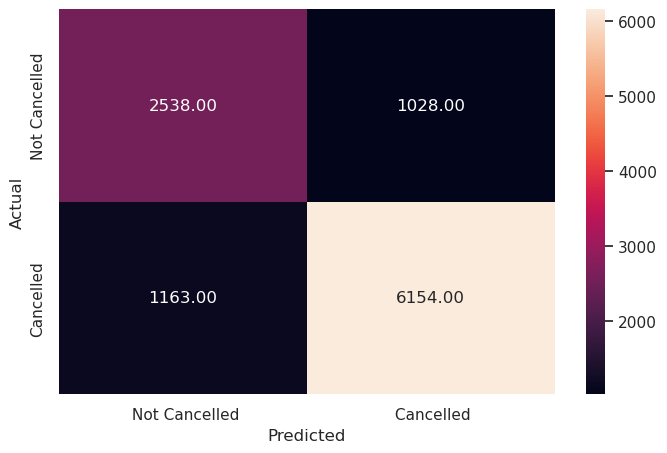

In [62]:
y_pred_test_svm = model.predict_proba(X_test_scaled)
y_pred_test_labels = np.where(y_pred_test_svm[:, 1] > optimal_threshold_svm, 'Not_Canceled', 'Canceled')
metrics_score(y_test, y_pred_test_labels)

1. The performance of the model has increased after optimum threshold is defined as 0.6
2. The recall score is increased by 10% i.e. from 61% to 71%

**Build a Support Vector Machines model using an RBF kernel**

In [67]:
svm_rbf = SVC(kernel="rbf", probability=True)
svm_rbf.fit(X_train_scaled, y_train)

SVC(probability=True)

              precision    recall  f1-score   support

    Canceled       0.79      0.66      0.72      8319
Not_Canceled       0.85      0.91      0.88     17073

    accuracy                           0.83     25392
   macro avg       0.82      0.79      0.80     25392
weighted avg       0.83      0.83      0.83     25392



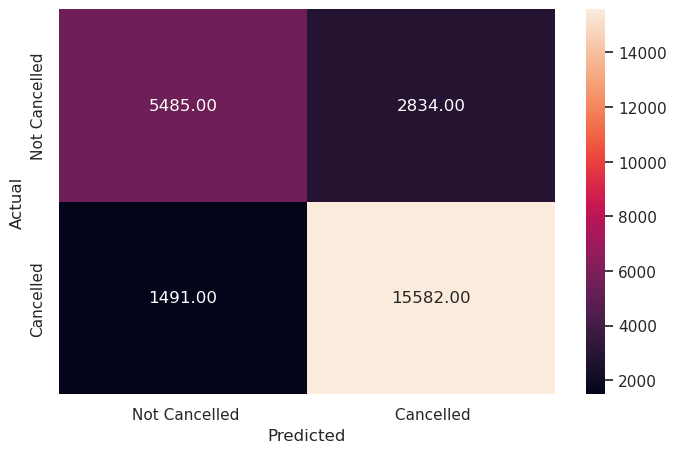

In [68]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

1. The recall score is 0.66
1. The recall score is increased by 5% after using RBF kernel

              precision    recall  f1-score   support

    Canceled       0.78      0.65      0.71      3566
Not_Canceled       0.84      0.91      0.87      7317

    accuracy                           0.82     10883
   macro avg       0.81      0.78      0.79     10883
weighted avg       0.82      0.82      0.82     10883



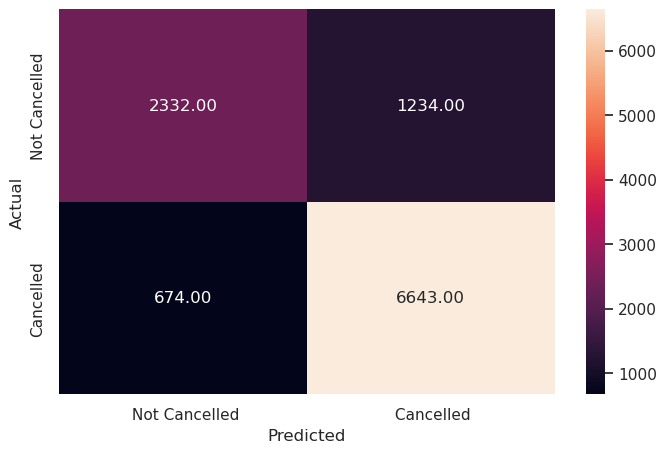

In [70]:
y_pred_test = svm_rbf.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)

1. The recall score is 0.65
1. The recall score is increased by 3% after using RBF kernel

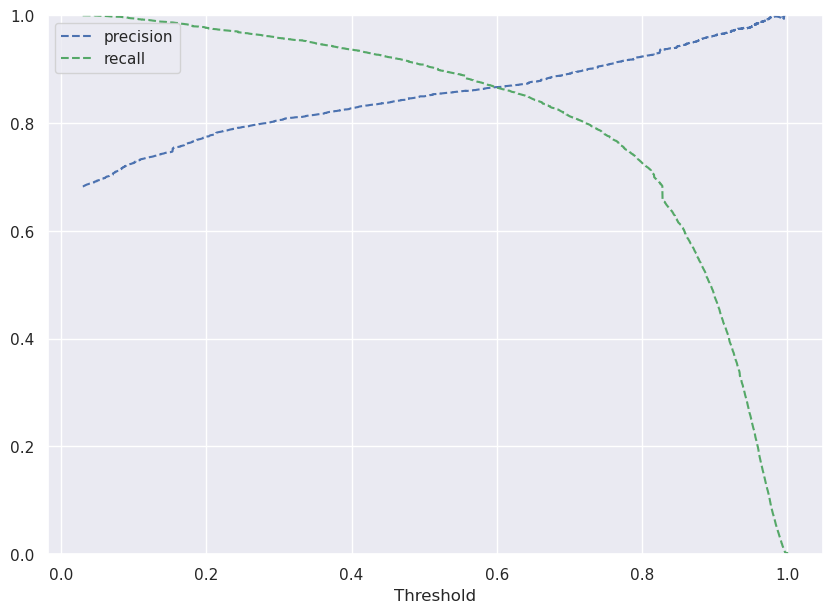

In [73]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_binary, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

The optimum threshold is 0.60

In [75]:
optimal_threshold_svm=0.6

              precision    recall  f1-score   support

    Canceled       0.69      0.71      0.70      8319
Not_Canceled       0.86      0.85      0.85     17073

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



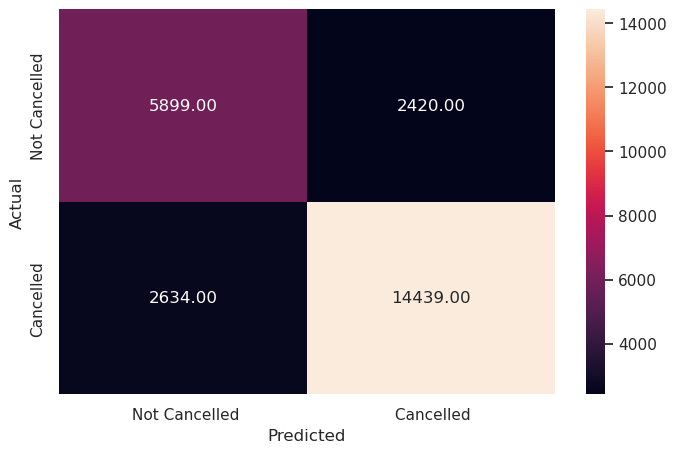

In [77]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
y_pred_train_labels = np.where(y_pred_train_svm[:, 1] > optimal_threshold_svm, 'Not_Canceled', 'Canceled')
metrics_score(y_train, y_pred_train_labels)


1. The recall score is 0.71
1. The recall score is improved by 5%
1. The model performance is slightly improved by using RBF kernel by 5%

              precision    recall  f1-score   support

    Canceled       0.69      0.71      0.70      3566
Not_Canceled       0.86      0.84      0.85      7317

    accuracy                           0.80     10883
   macro avg       0.77      0.78      0.77     10883
weighted avg       0.80      0.80      0.80     10883



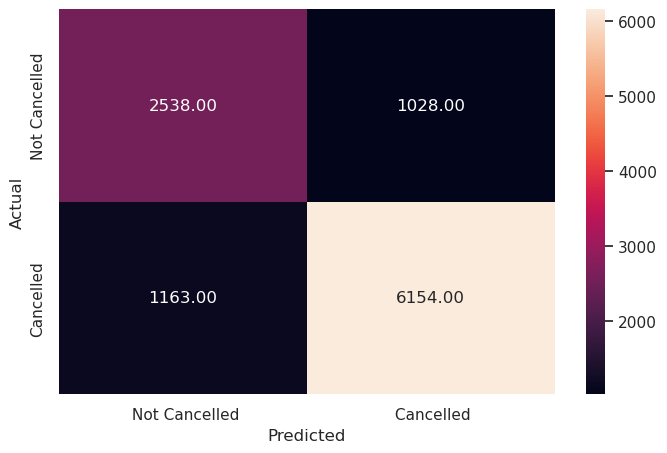

In [78]:
y_pred_test_svm = model.predict_proba(X_test_scaled)
y_pred_test_labels = np.where(y_pred_test_svm[:, 1] > optimal_threshold_svm, 'Not_Canceled', 'Canceled')
metrics_score(y_test, y_pred_test_labels)

1.  The recall score is 0.71
1. The recall score is improved by %6
1. The model performance is slightly improved by using RBF kernel by 6%

**Decision Tree**

In [63]:
model_dec = DecisionTreeClassifier(random_state=1)
model_dec.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

    Canceled       0.99      0.99      0.99      8319
Not_Canceled       1.00      1.00      1.00     17073

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



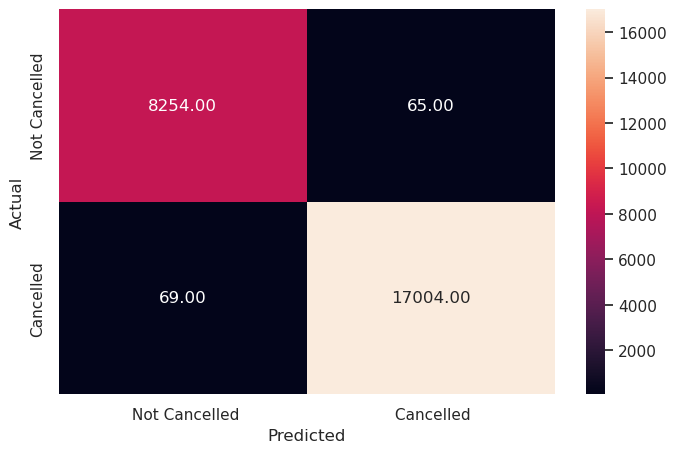

In [66]:
pred_train_dec = model_dec.predict(X_train)
metrics_score(y_train, pred_train_dec)

1. The recall score is 0.99
1. There is almost no errors in the training set
1. Model's performance is good in training set.
1. By seeing the performance the model maybe overfitting

              precision    recall  f1-score   support

    Canceled       0.78      0.80      0.79      3566
Not_Canceled       0.90      0.89      0.90      7317

    accuracy                           0.86     10883
   macro avg       0.84      0.85      0.84     10883
weighted avg       0.86      0.86      0.86     10883



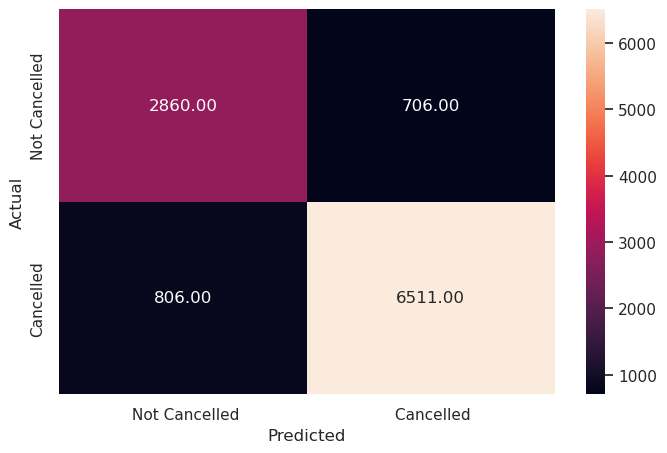

In [65]:
pred_test_dec = model_dec.predict(X_test)
metrics_score(y_test, pred_test_dec)

1. By seeing the performance we can see that decision tree model is overfitting however it has better performance than Linear Regression and SVM models
1. We need to tune the model to reduce overftting


In [98]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "max_depth": np.arange(2, 9, 2),
    "max_leaf_nodes": [50, 75, 100, 125],
    "min_samples_split": [10, 30, 50, 70],
}
grid_obj = GridSearchCV(estimator, parameters, cv=5, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
estimator = grid_obj.best_estimator_
estimator.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

              precision    recall  f1-score   support

    Canceled       0.72      0.43      0.54      8319
Not_Canceled       0.77      0.92      0.84     17073

    accuracy                           0.76     25392
   macro avg       0.75      0.68      0.69     25392
weighted avg       0.75      0.76      0.74     25392



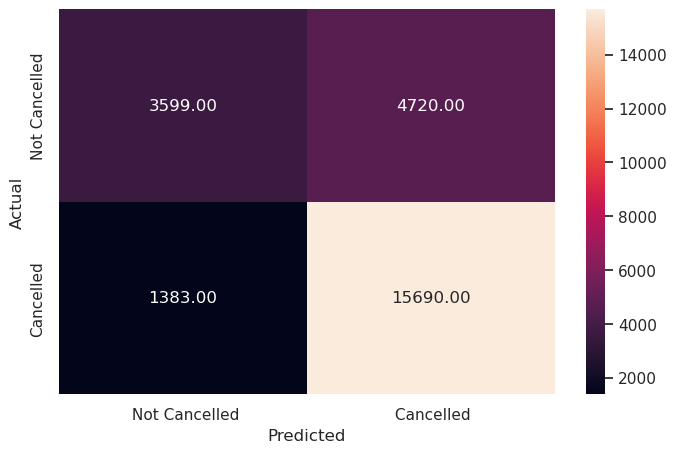

In [84]:
dec_tuned = estimator.predict(X_train)
metrics_score(y_train, dec_tuned)

The recall score is 0.43
The performance of the model has drastically decreased but lets confirm after checking test dataset

              precision    recall  f1-score   support

    Canceled       0.72      0.44      0.55      3566
Not_Canceled       0.77      0.92      0.84      7317

    accuracy                           0.76     10883
   macro avg       0.75      0.68      0.69     10883
weighted avg       0.76      0.76      0.74     10883



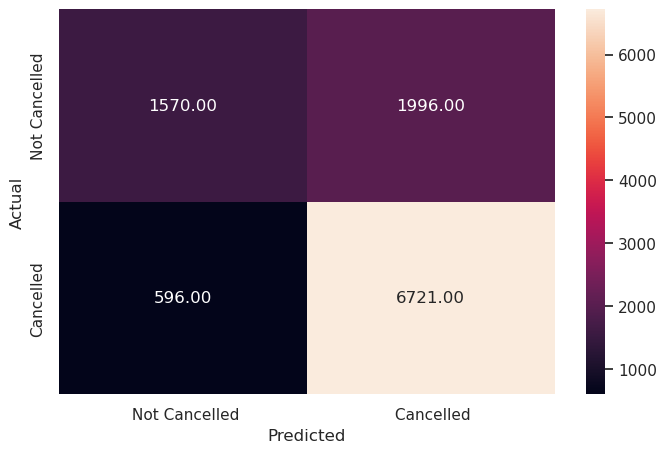

In [86]:
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

1. The recall score is 0.44
1. Hence we confirm that the decsion tree model is overfitting the training data
1. Tuning the model may have provided proper performance since it has moderate precision and recall values



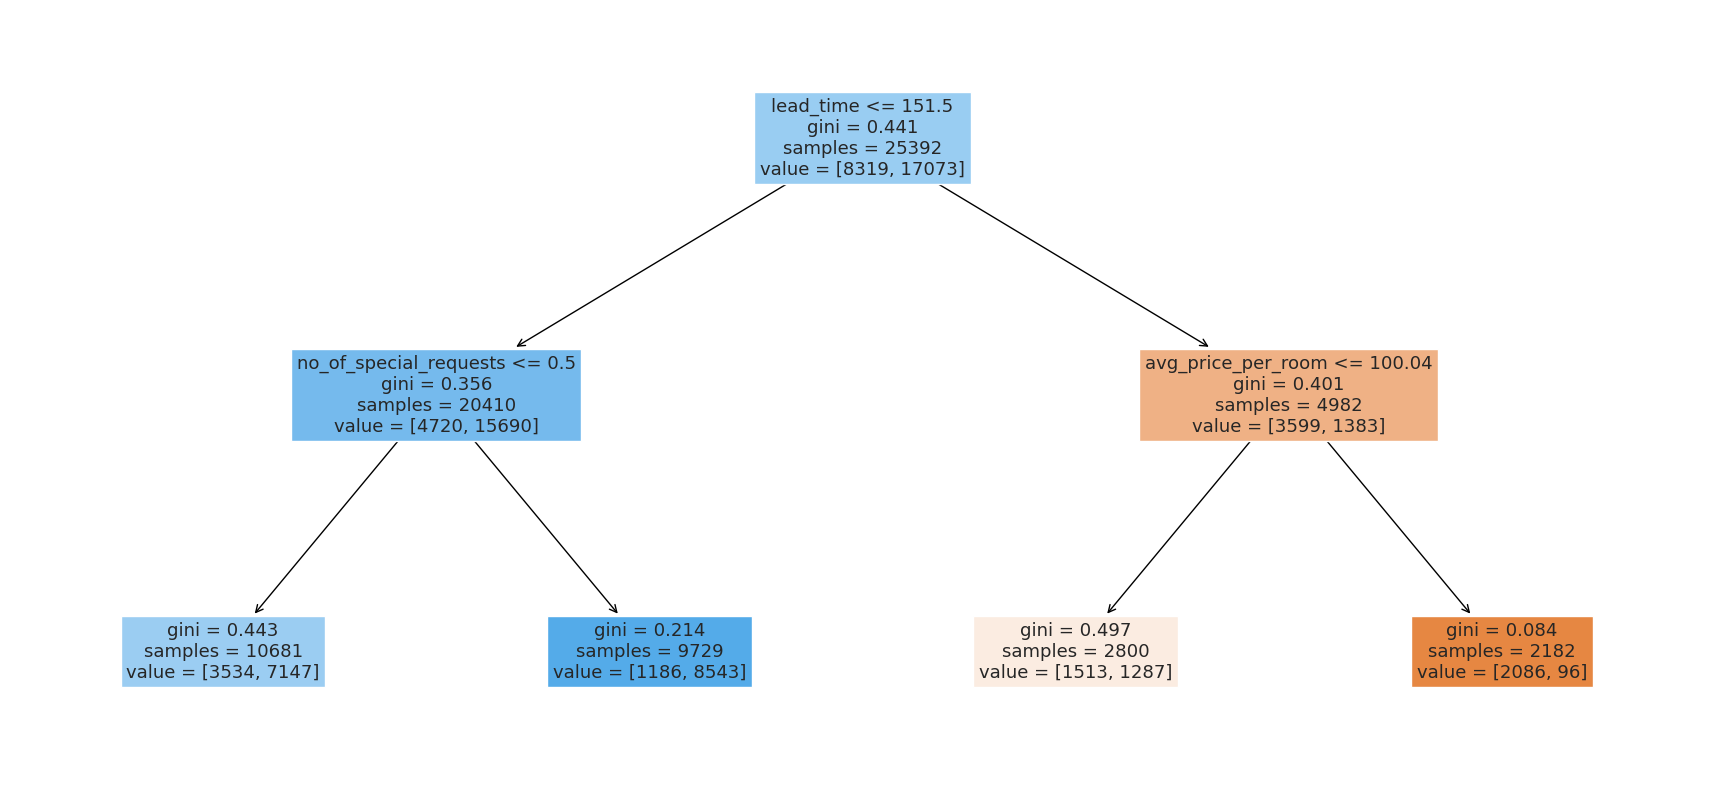

In [89]:
feature_names = list(X_train.columns)
plt.figure(figsize=(22, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=13,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

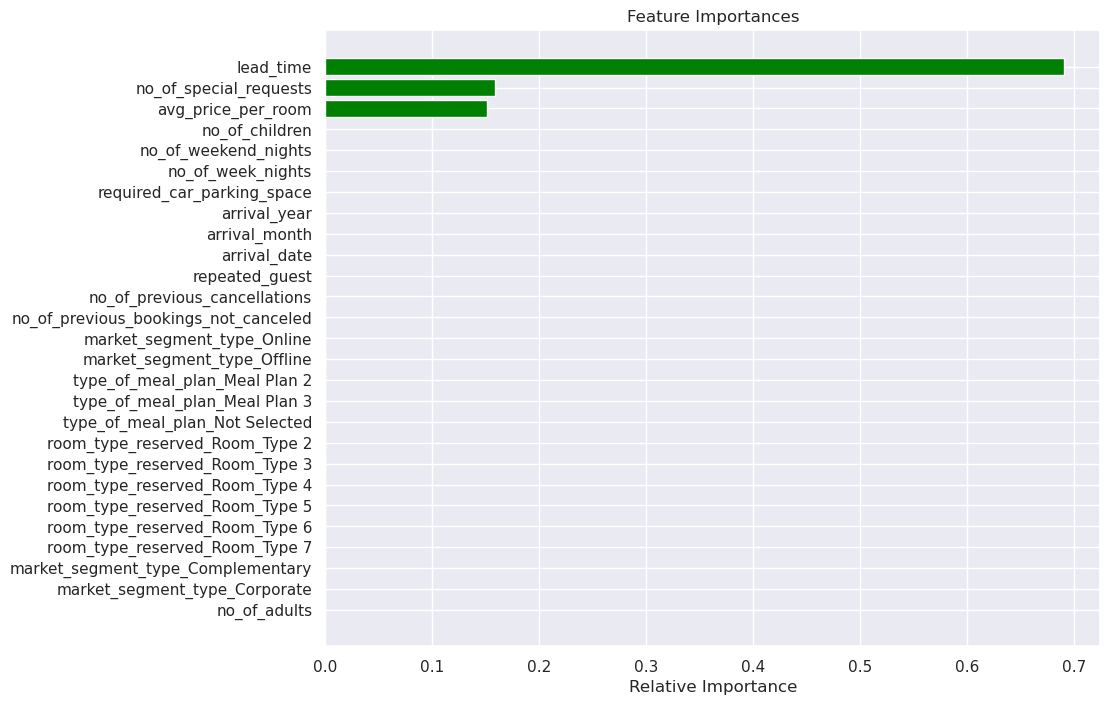

In [90]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

1. Here we can see that the decsion tree has become simpler and easily readable
1. The performance of the model is greatly improved
1. We can see that the most important features are
* lead_time
* no_of_special_requests
* avg_price_per_room


**Random Forest**

In [91]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
RandomForestClassifier(random_state=1)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

    Canceled       1.00      0.99      0.99      8319
Not_Canceled       0.99      1.00      1.00     17073

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



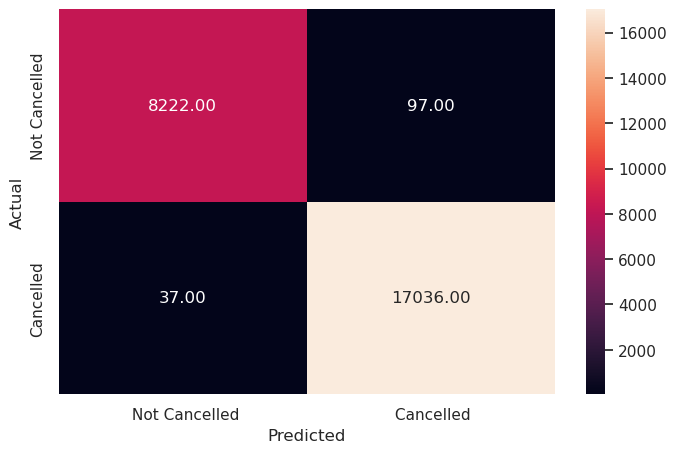

In [93]:
y_pred_train_rf = rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

1. The recall score is 0.99
1. There are almost 0 errors on the training set
1. The model performed very well on the training set


              precision    recall  f1-score   support

    Canceled       0.87      0.81      0.84      3566
Not_Canceled       0.91      0.94      0.92      7317

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



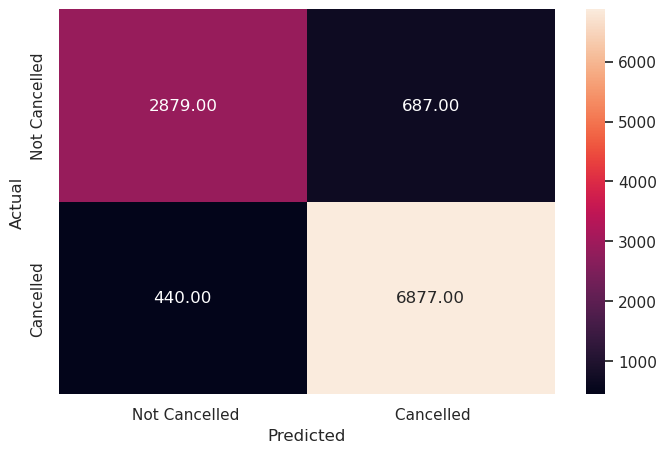

In [94]:
y_pred_test_rf = rf.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

1. The recall score is 0.81
1. The model performed very well on the test set

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Importance', ylabel='index'>

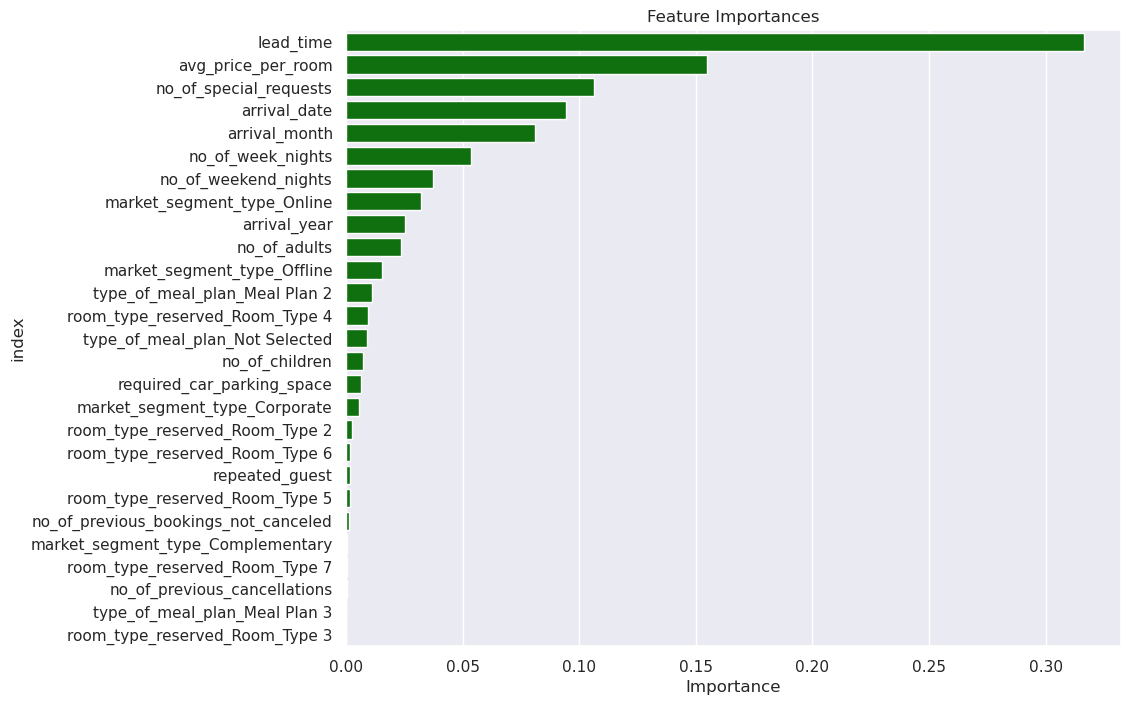

In [96]:
importances = rf.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(importance_df.reset_index(), x='Importance', y='index', color="green")

In [97]:
importance_df

,Importance
lead_time,0.316512
avg_price_per_room,0.154674
no_of_special_requests,0.106251
arrival_date,0.094255
arrival_month,0.080958
no_of_week_nights,0.053394
no_of_weekend_nights,0.037513
market_segment_type_Online,0.032174
arrival_year,0.025399
no_of_adults,0.023734


1. The most important features of random forest are
* lead_time	0.316512
* avg_price_per_room
* no_of_special_request
2. lead_time is the most important feature
3. avg_price_per_room is the second most important feature hence as price increases the no of cancellations decreases

** takeaways for business recommendations**

1. The lead_time,avg_price_per_room and no+of_special_request are most important features
1. Corporate and complimentary users has the highest part of booking status
1. for the auxilary,Offline and Online refund policies can be implemented by the comany
1. adults are the least repeated guests 
1. As the no of days the user stays increases the chance of cancellation increases